In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import plotly.graph_objs as go
from tqdm import tqdm
df = pd.read_csv('techSalaries2017.csv')
#df = df.drop(['company', 'title', 'location'], axis = 1)

pd.set_option("display.max_columns", None)
df = df.drop(['company', 'title', 'location', 'basesalary','stockgrantvalue','bonus'], axis = 1)
# Scale totalyearly compensation
df['totalyearlycompensation'] /= 1000
df = df.dropna()

In [7]:
df.gender.value_counts()
df.gender = df.gender.replace('Male', 0).replace('Female', 1).replace('Other',2)

In [9]:
df


,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
15710,400.0,5.0,5.0,0,0,0,1,0,0,1,0,0,0,0,Asian,PhD,45,68.891,9,1166,3.04
23532,136.0,3.0,2.0,0,0,1,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree,24,61.454,12,1175,3.07
23533,337.0,6.0,6.0,0,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree,25,65.455,1,1268,3.34
23534,222.0,4.0,4.0,0,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree,32,73.769,8,1070,2.75
23535,187.0,5.0,0.0,0,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree,29,68.710,2,1187,3.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,1470.0,9.0,7.0,0,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree,31,68.402,12,1436,3.77
61982,4500.0,20.0,14.0,0,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree,57,69.195,6,1363,3.50
61984,1605.0,16.0,2.0,1,1,0,0,0,0,0,1,0,0,0,White,Master's Degree,55,66.902,11,1447,3.77
61987,2372.0,22.0,2.0,0,1,0,0,0,0,0,0,0,1,0,Black,Master's Degree,50,62.691,8,1513,3.85


In [20]:
X = df.drop(['Race', 'Education',  'Zodiac', 'totalyearlycompensation'], axis = 1)
X = X.join(pd.get_dummies(X['gender'])).drop('gender', axis = 1)
y = df.totalyearlycompensation
X

,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Age,Height,SAT,GPA,0,1,2
15710,5.0,5.0,0,0,1,0,0,1,0,0,0,0,45,68.891,1166,3.04,1,0,0
23532,3.0,2.0,0,1,0,0,0,0,0,1,0,0,24,61.454,1175,3.07,1,0,0
23533,6.0,6.0,0,1,0,0,0,1,0,0,0,0,25,65.455,1268,3.34,1,0,0
23534,4.0,4.0,1,0,0,0,0,1,0,0,0,0,32,73.769,1070,2.75,1,0,0
23535,5.0,0.0,0,1,0,0,0,0,1,0,0,0,29,68.710,1187,3.23,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,9.0,7.0,0,1,0,0,0,1,0,0,0,0,31,68.402,1436,3.77,1,0,0
61982,20.0,14.0,1,0,0,0,0,1,0,0,0,0,57,69.195,1363,3.50,1,0,0
61984,16.0,2.0,1,0,0,0,0,0,1,0,0,0,55,66.902,1447,3.77,0,1,0
61987,22.0,2.0,1,0,0,0,0,0,0,0,1,0,50,62.691,1513,3.85,1,0,0


In [17]:
ols = LinearRegression().fit(X,y)
ols.score(X,y)

0.26640273968705264

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/a/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04854e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
100%|██████████| 1000/1000 [00:05<00:00, 185.41it/s]


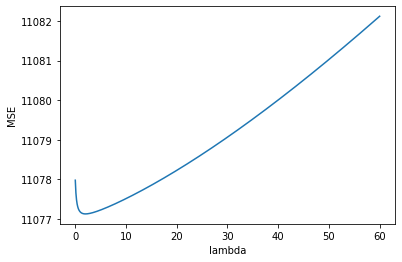

In [19]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)#, random_state = 0)
lambdas = np.linspace(0,60, 1000)
mse = []

# running this again will change the model and therefore the optimal lambda, therefore I commented this out

for ii in tqdm(lambdas):
    ridgeModel = Ridge(alpha=ii).fit(XTrain, yTrain)
    error = MSE(yTest,ridgeModel.predict(XTest))
    mse.append(error)
plt.plot(lambdas, mse)
plt.xlabel('lambda')
plt.ylabel('MSE');